### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
auto_data = pd.read_csv("ford.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [4]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [5]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


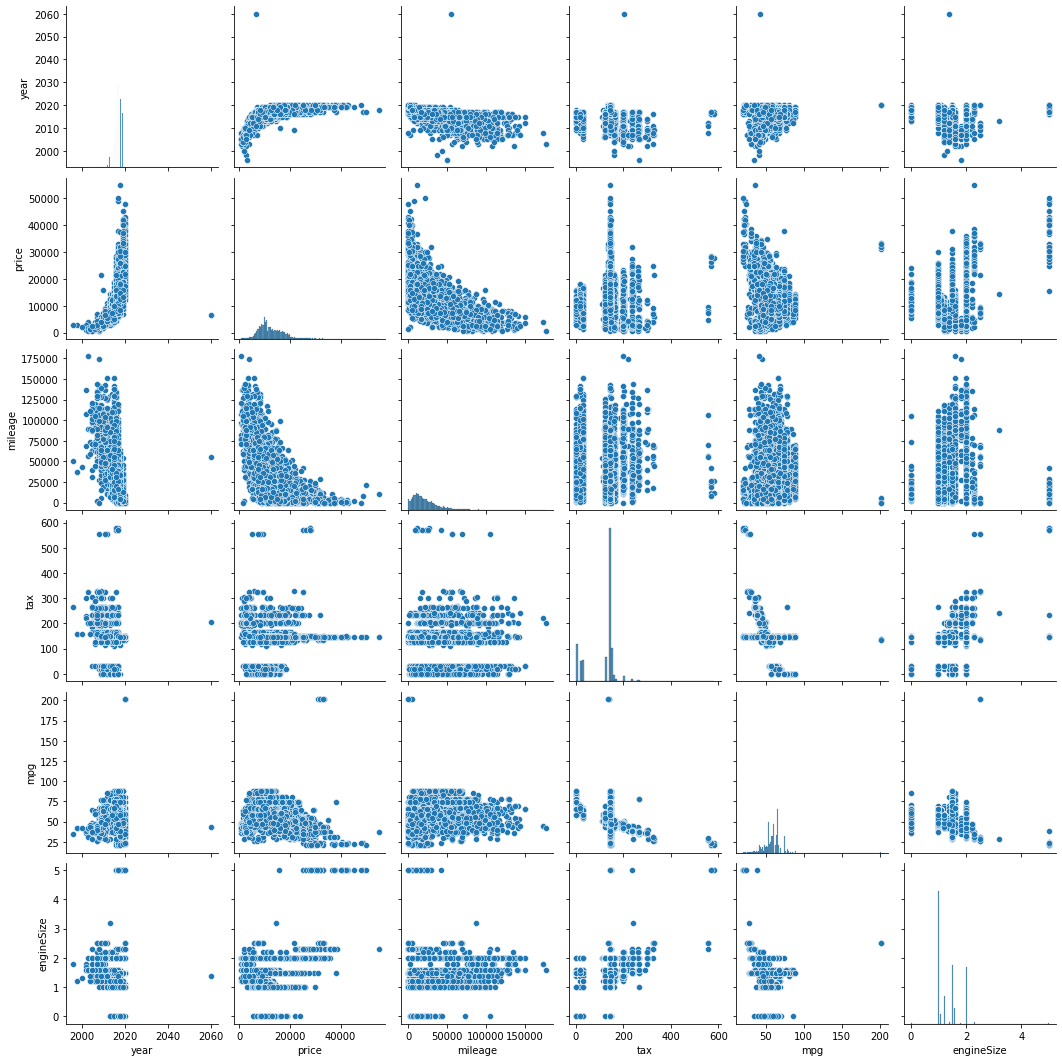

In [6]:
sns.pairplot(auto_data)

<AxesSubplot:>

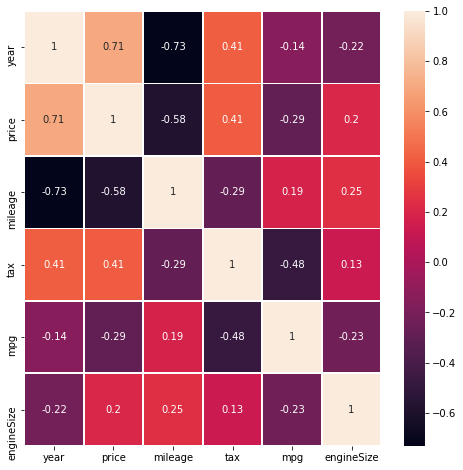

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(auto_data.corr(method='spearman'), annot = True, linewidths=0.7, ax=ax )

In [162]:
auto_data_dummy = pd.concat([auto_data.drop(['engineSize', 'mpg','model','transmission','fuelType'], axis=1), 
                             pd.get_dummies(auto_data['model']),
                             pd.get_dummies(auto_data['transmission']),
                             pd.get_dummies(auto_data['fuelType']),
                             pd.get_dummies(auto_data['engineSize']),
                             #pd.get_dummies(auto_data['tax']),
                             pd.get_dummies(auto_data['mpg'])
                            ], axis = 1)
auto_data_dummy

,year,price,mileage,tax,B-MAX,C-MAX,EcoSport,Edge,Escort,Fiesta,...,74.3,74.4,76.3,76.4,78.5,80.7,83.1,85.6,88.3,201.8
0,2017,12000,15944,150,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2018,14000,9083,150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,13000,12456,150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,17500,10460,145,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2019,16500,1482,145,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17960,2016,7999,31348,125,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17961,2017,8999,16700,150,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17962,2014,7499,40700,30,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17963,2015,9999,7010,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

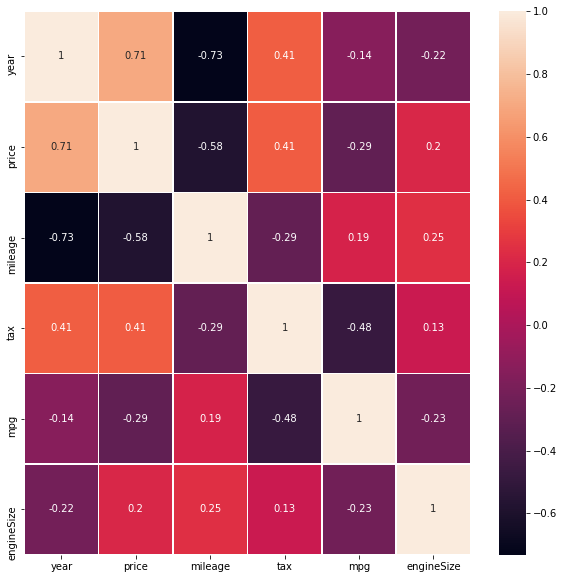

In [163]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(auto_data.corr(method='spearman'), annot = True, linewidths=0.7, ax=ax )

In [164]:
X, Y = auto_data_dummy.drop(['price'], axis=1), auto_data['price']
X

,year,mileage,tax,B-MAX,C-MAX,EcoSport,Edge,Escort,Fiesta,Focus,...,74.3,74.4,76.3,76.4,78.5,80.7,83.1,85.6,88.3,201.8
0,2017,15944,150,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,9083,150,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2017,12456,150,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2019,10460,145,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,1482,145,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17960,2016,31348,125,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17961,2017,16700,150,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17962,2014,40700,30,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17963,2015,7010,20,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [165]:
Y

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17960     7999
17961     8999
17962     7499
17963     9999
17964     8299
Name: price, Length: 17965, dtype: int64

In [166]:
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split

#Lasso - модуль весов, Ridge - квадрат весов

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train

,year,mileage,tax,B-MAX,C-MAX,EcoSport,Edge,Escort,Fiesta,Focus,...,74.3,74.4,76.3,76.4,78.5,80.7,83.1,85.6,88.3,201.8
7507,2016,22892,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9586,2019,2801,150,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13824,2020,7,135,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,2018,23079,145,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7791,2019,2000,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,2018,13870,145,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7291,2016,19398,125,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17728,2017,15083,125,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7293,2017,33847,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [168]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

array([[-0.40800219, -0.02734886, -1.83235028, ..., -0.0418637 ,
        -0.06865833, -0.01994423],
       [ 1.03224134, -1.05680129,  0.58452084, ..., -0.0418637 ,
        -0.06865833, -0.01994423],
       [ 1.51232252, -1.1999644 ,  0.34283373, ..., -0.0418637 ,
        -0.06865833, -0.01994423],
       ...,
       [ 0.07207899, -0.42747797,  0.18170899, ..., -0.0418637 ,
        -0.06865833, -0.01994423],
       [ 0.07207899,  0.53397967, -1.83235028, ..., -0.0418637 ,
        -0.06865833, -0.01994423],
       [-0.88808337,  0.95275995,  0.50395847, ..., -0.0418637 ,
        -0.06865833, -0.01994423]])

In [169]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)
simple_LR_predictions = simple_LR.predict(X_test_scaled)

simple_LR_MSE = metrics.mean_squared_error(Y_test, simple_LR_predictions)

print (f'MSE = {round(simple_LR_MSE,3)}')

MSE = 9.365190878728767e+29


In [170]:
simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False)

print (f'RMSE = {round(simple_LR_RMSE,3)}')

RMSE = 967739163138950.8


In [171]:
print (f'Test std: {round(Y_test.std(),3)}')

Test std: 4747.084


Text(0, 0.5, 'Target')

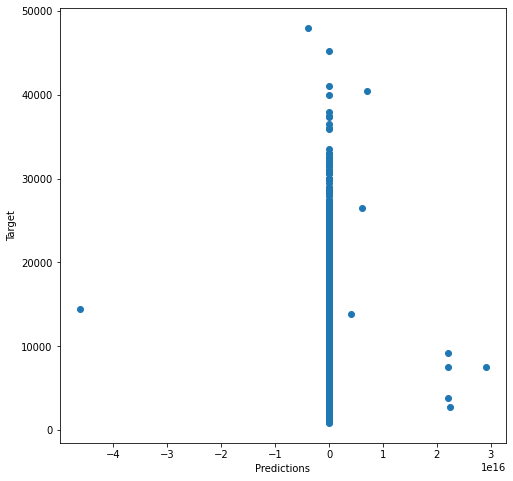

In [172]:
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [173]:
pd.DataFrame(simple_LR.coef_, auto_data_dummy.columns[1:], columns=['Coefficients'])

,Coefficients
price,1.781947e+03
mileage,-1.375511e+03
tax,1.133610e+02
B-MAX,-5.347712e+14
C-MAX,-6.335416e+14
...,...
80.7,-5.329814e+14
83.1,-1.270574e+14
85.6,-3.438131e+14
88.3,-5.622067e+14


In [174]:
model = Lasso()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data_dummy.columns[1:], columns=['Coefficients'])

RMSE = 1646.27


,Coefficients
price,1776.620654
mileage,-1371.290425
tax,110.718759
B-MAX,-384.831411
C-MAX,-302.111744
...,...
80.7,-16.151790
83.1,-34.023551
85.6,-44.711721
88.3,-103.870558


Text(0, 0.5, 'Target')

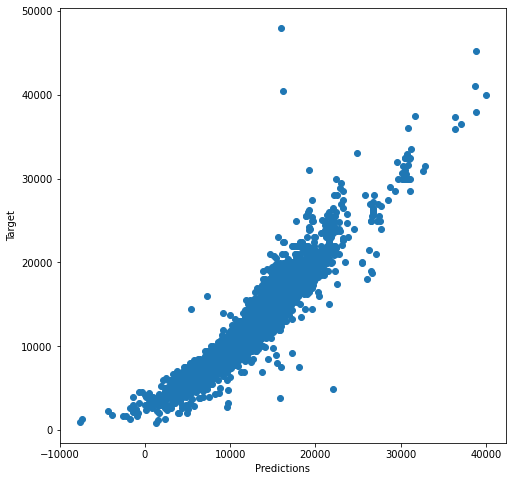

In [175]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [176]:
model = LassoCV(random_state=10)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data_dummy.columns[1:], columns=['Coefficients'])

RMSE = 1559.307


,Coefficients
price,1775.288144
mileage,-1362.130044
tax,146.236684
B-MAX,-366.059466
C-MAX,-268.735127
...,...
80.7,0.000000
83.1,-13.697796
85.6,-16.512573
88.3,-56.342864


Text(0, 0.5, 'Target')

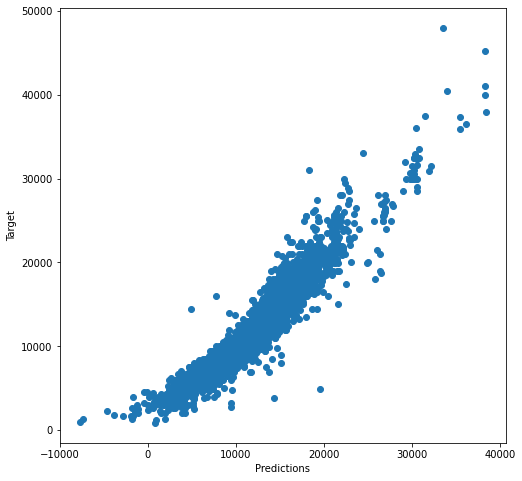

In [177]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [178]:
model = Ridge()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data_dummy.columns[1:], columns=['Coefficients'])

RMSE = 1664.03


,Coefficients
price,1776.199540
mileage,-1371.539189
tax,108.210345
B-MAX,-338.252589
C-MAX,-247.876403
...,...
80.7,-22.036054
83.1,-36.167579
85.6,-48.739823
88.3,-110.811592


Text(0, 0.5, 'Target')

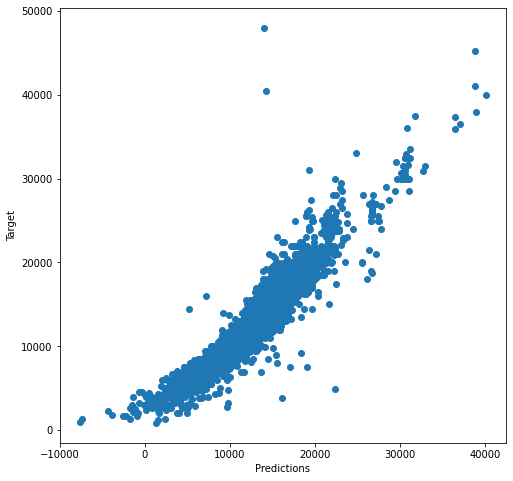

In [179]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [180]:
model = RidgeCV()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data_dummy.columns[1:], columns=['Coefficients'])

RMSE = 1658.092


,Coefficients
price,1774.256248
mileage,-1371.003992
tax,109.448175
B-MAX,-337.807198
C-MAX,-247.798389
...,...
80.7,-21.987829
83.1,-36.132406
85.6,-48.661390
88.3,-110.742646


In [181]:
alphas = np.linspace(1, 10, 20)
alphas

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [182]:
model = LassoCV(random_state = 10, alphas=alphas)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data_dummy.columns[1:], columns=['Coefficients'])

RMSE = 1572.12


,Coefficients
price,1776.632804
mileage,-1364.967450
tax,133.580247
B-MAX,-372.239953
C-MAX,-280.162126
...,...
80.7,-0.000000
83.1,-21.499878
85.6,-26.530195
88.3,-73.034340


Text(0, 0.5, 'Target')

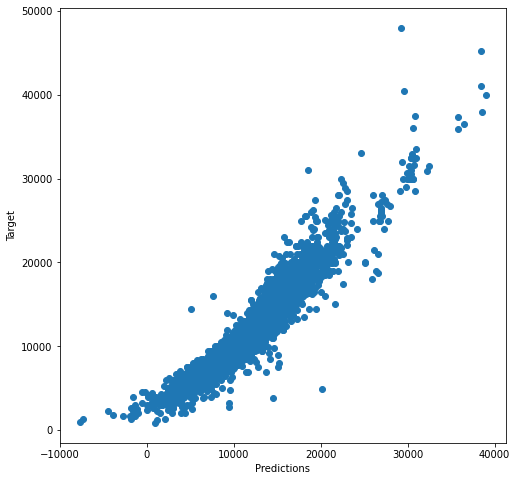

In [183]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [184]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 10, n_estimators = 100, max_depth=20)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.feature_importances_, auto_data_dummy.columns[1:], columns=['Importance']).sort_values('Importance')

RMSE = 1207.314


,Importance
30.4,0.000000
3.2,0.000000
23.9,0.000000
32.1,0.000000
Ranger,0.000000
...,...
Kuga,0.033683
Mustang,0.062535
mileage,0.066590
2.0,0.176623


Text(0, 0.5, 'Target')

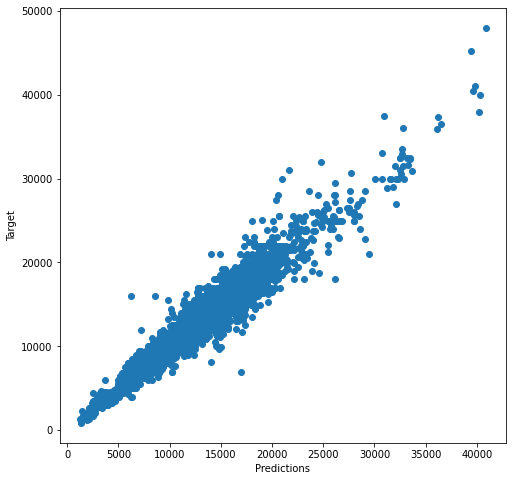

In [185]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')